## Analyzing the Difference between the two highest eigenvalues of the "Adjacency Matrix of Band Random Graphs"


We first start off by creating a random band matrix with width "W"

In [39]:
# standard imports 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider, Button
from scipy.stats import bernoulli, binom
from ipywidgets import *
import time
import random

# creating a random band matrix of size n*n where n is given as input
# the band width will be given by w, M(i,j) = 0 if i-j > w or i-j < -w
# def random_band_matrix(n, w, p):
#     M = np.zeros((n,n))
#     for i in range(n):
#         for j in range(n):
#             if i-j < w and i-j > -w and i!=j:
#                 if random.random() < p: # choose a random number within [0,1) and if it is less than p, then set matrix entry to 1, else set to 0
#                     M[i,j] = 1
#                 else:
#                     M[i,j] = 0
#                 # M[i,j] = w
#     # making the matrix symmetric by and setting the diagonal elements to zero 
#     for i in range(n):
#         for j in range(n):
#             if i > j:
#                 M[j,i] = M[i,j] 
#             if i == j:
#                 M[i,j] = 0
#     return M
def random_band_matrix(n,w,p):
    M = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1,n):
            # choose either 0 or 1 with probability p in a bernoulli distribution
            # sample from the bernoulli distribution and set the entry to 1 if the sample is 1, else set to 0
            if random.random() < p:
                if abs(i-j) < w:
                    M[i,j] = 1
                    M[j,i] = 1

            
    return M

            

You can test out the Random Band Matrix Generator as well by running the cell below

In [34]:
random_band_matrix(10,1,0.5)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [35]:



# find the highest and second highest eigenvalue of the matrix M
def find_gap(M):
    eigenvalues = np.linalg.eigvals(M) # finding the eigenvalues of the matrix M
    eigenvalues.sort() # sorting the eigenvalues in ascending order
    e1=eigenvalues[-1] # highest eigenvalue
    e2=eigenvalues[-2] # second highest eigenvalue
    return 1-e2/e1

# take n = 1000 and vary w from 10 to n and store the value of 1-e2/e1 in a list and then plot it vs w

/tmp/ipykernel_120665/3372161182.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return 1-e2/e1
/home/rudranshps/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


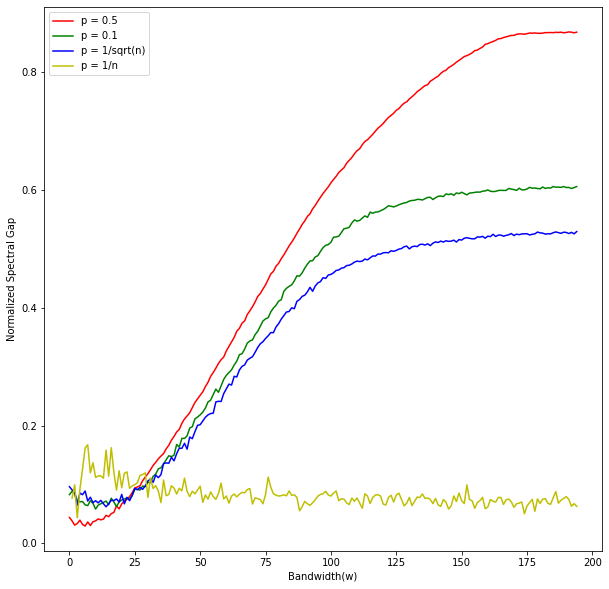

In [72]:
from math import sqrt


def plot_gap(n):
    w_list_1 = [] # will use p = 0.5
    w_list_2 = [] # will use p = 0.1
    w_list_3 = [] # will use p = 0.01
    w_list_4 = [] # will use p = 0.001
    w_list_1_average = []
    w_list_2_average = []
    w_list_3_average = []
    w_list_4_average = []
    for i in range(50):
        for w in range(5,n):
            M = random_band_matrix(n, w, 0.5)
            w_list_1.append(find_gap(M))
        w_list_1_average.append(w_list_1)
        w_list_1 = []
    for i in range(50):
        for w in range(5,n):
            M = random_band_matrix(n, w, 0.1)
            w_list_2.append(find_gap(M))
        w_list_2_average.append(w_list_2)
        w_list_2 = []
    for i in range(50):
        for w in range(5,n):
            M = random_band_matrix(n, w, 1/sqrt(n))
            w_list_3.append(find_gap(M))
        w_list_3_average.append(w_list_3)
        w_list_3 = []
    for i in range(50):
        for w in range(5,n):
            M = random_band_matrix(n, w, 0.005)
            w_list_4.append(find_gap(M))
        w_list_4_average.append(w_list_4)
        w_list_4 = []
    
    w_list_1_average = np.mean(w_list_1_average, axis=0) 
    w_list_2_average = np.mean(w_list_2_average, axis=0)
    w_list_3_average = np.mean(w_list_3_average, axis=0)
    w_list_4_average = np.mean(w_list_4_average, axis=0)
    
    # plot all of them on the same graph 
    plt.figure(figsize=(10,10))
    plt.plot(w_list_1_average,color='r',label='p = 0.5')
    plt.plot(w_list_2_average,color='g',label='p = 0.1')
    plt.plot(w_list_3_average,color='b',label='p = 1/sqrt(n)')
    plt.plot(w_list_4_average,color='y',label='p = 1/n')
    plt.xlabel('Bandwidth(w)')
    plt.ylabel('Normalized Spectral Gap')
    plt.legend()
    plt.show()

plot_gap(200)







